<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

In [15]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*',with_info=True)

In [16]:
#Preprocess and split the dataset
def preprocess_data(item):
  image = tf.image.resize(item['image'], (256, 256))/255.0
  mask = item['segmentation_mask']
  mask-= 1
  mask = tf.image.resize(mask, (256,256))>0
  return image, tf.cast(mask, tf.float32)

train_dataset = dataset['train'].map(preprocess_data).shuffle(1000).batch(32)
test_dataset = dataset['test'].map(preprocess_data).batch(32)

In [17]:
# Define U-Net architecture
def unet_model(input_shape):
  inputs = tf.keras.Input(shape=input_shape)

  # Encoder
  conv1 = layers.Conv2D(64, 3, activation= 'relu', padding='same')(inputs)
  conv1 = layers.Conv2D(64, 3, activation= 'relu', padding='same')(conv1)
  pool1 = layers.MaxPooling2D(pool_size=(2,2))(conv1)

  # Decoder
  conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
  conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
  up1 = layers.UpSampling2D(size=(2,2))(conv2)

  # Output layer
  outputs = layers.Conv2D(1,1,activation='sigmoid')(up1)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

In [18]:
# Instantiate the model
input_shape = (256, 256, 3)
model = unet_model(input_shape)

# Compile and train the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_dataset, epochs=5)

# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/5
115/115 [==============================] - 41s 317ms/step - loss: 0.5658 - accuracy: 0.7048
Epoch 2/5
115/115 [==============================] - 39s 314ms/step - loss: 0.5368 - accuracy: 0.7050
Epoch 3/5
115/115 [==============================] - 40s 320ms/step - loss: 0.5251 - accuracy: 0.7074
Epoch 4/5
115/115 [==============================] - 40s 317ms/step - loss: 0.5042 - accuracy: 0.7325
Epoch 5/5
115/115 [==============================] - 13s 108ms/step - loss: 0.4879 - accuracy: 0.7393
Test Accuracy: 0.7393001317977905


In [19]:
# Apply preproceessing to a single item for visualization
visualization_dataset = dataset['test'].map(preprocess_data).take(1)

1/1 [==============================] - 0s 69ms/step


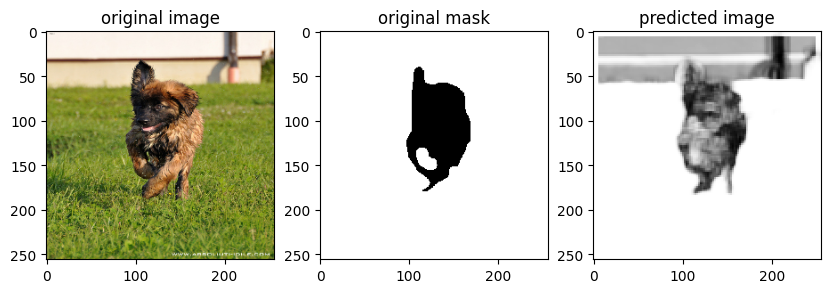

In [20]:
import matplotlib.pyplot as plt
for image, mask in visualization_dataset:
  image = tf.expand_dims(image, 0)
  predicted_mask = model.predict(image)[0]
  plt.figure(figsize=(10,4))
  plt.subplot(1,3,1)
  plt.imshow(image[0])
  plt.title("original image")
  plt.subplot(1,3,2)
  plt.imshow(mask[:,:,0],cmap='gray')
  plt.title("original mask")
  plt.subplot(1,3,3)
  plt.imshow(predicted_mask[:,:,0],cmap='gray')
  plt.title("predicted image")